# IMPORT NECESARY LIBRARIES 

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

# Date & Time processing
from datetime import datetime


In [2]:
# Load dataset
data = pd.read_csv("netflix1.csv")

# Display first 5 rows
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
# check for missing values
print("Missing Values in Each column:\n")
print(data.isnull().sum())

# check data types
print("\nColumn Data Types:\n")
print(data.dtypes)

Missing Values in Each column:

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

Column Data Types:

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object


In [4]:
# convert 'date_added' to datetime format
data["date_added"] = pd.to_datetime(data["date_added"])

# verify the change
print(data.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


In [5]:
#  Extract year and month from 'date_added'
data["year_added"] = data["date_added"].dt.year
data["month_added"] = data["date_added"].dt.month
data["day_added"] = data["date_added"].dt.day

# Display first 5 rows to verify
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,25
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,24
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9,22
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,24


In [6]:
# Split 'listed_in' into separate rows for each genre
data_explode = data.assign(genre=data["listed_in"].str.split(", ")).explode("genre")

# Diplay first few rows to verify
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,25
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,24
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9,22
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,24


In [7]:
data.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",2017,1,17
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,2018,9,13
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",2016,12,15
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,2018,6,23
8789,s8786,TV Show,YOM,Not Given,Pakistan,2018-06-07,2016,TV-Y7,1 Season,Kids' TV,2018,6,7


In [8]:
data["listed_in"] = data["listed_in"].astype(str)
data_exploded = data.explode("listed_in")

data_exploded.rename(columns={"listed_in": 'genre'}, inplace = True)

data_exploded.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,genre,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,25
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,24
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9,22
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,24


In [9]:
# Extract numerical values from 'duration' column
data["duration_num"] = data["duration"].str.extract("(\d+)").astype(float)

# Create separate columns for Movies & TV Shows
data["is_movie"] = data["type"].apply(lambda x: 1 if x == "Movie" else 0)
data["is_tv_show"] = data["type"].apply(lambda x: 1 if x == "TV Show" else 0)

# Display first few rows
data[["title", "type", "duration", "duration_num", "is_movie", "is_tv_show"]].head()


,title,type,duration,duration_num,is_movie,is_tv_show
0,Dick Johnson Is Dead,Movie,90 min,90.0,1,0
1,Ganglands,TV Show,1 Season,1.0,0,1
2,Midnight Mass,TV Show,1 Season,1.0,0,1
3,Confessions of an Invisible Girl,Movie,91 min,91.0,1,0
4,Sankofa,Movie,125 min,125.0,1,0


# Genre Popularity Analysis

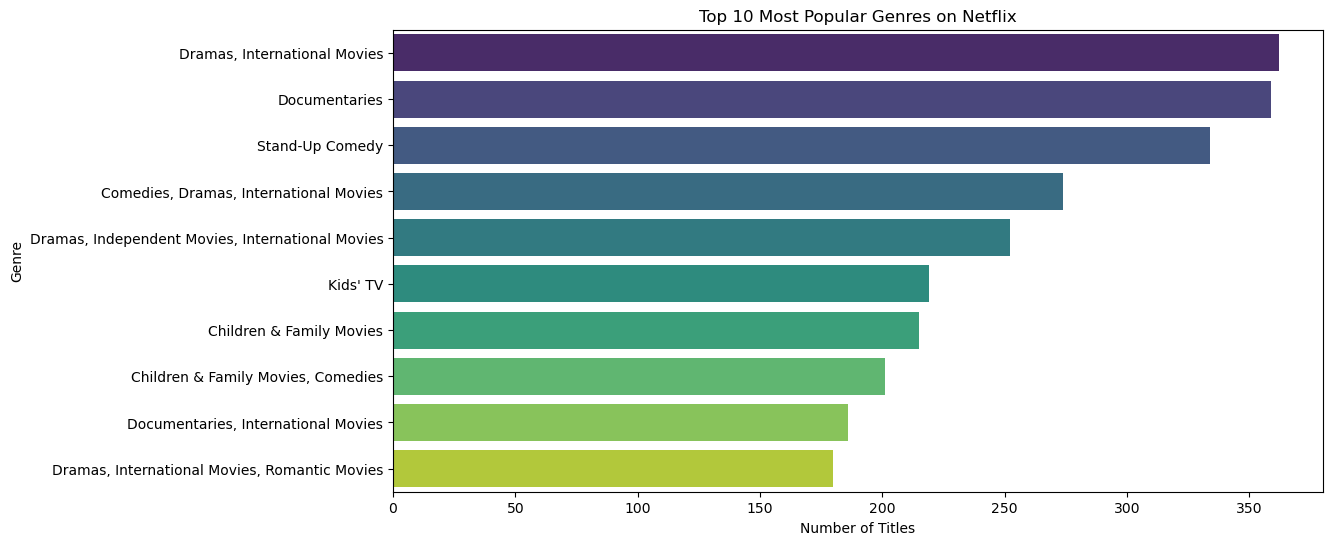

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each genre
top_genres = data_exploded["genre"].value_counts().head(10)

# Plot top 10 genres
plt.figure(figsize=(12,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.title("Top 10 Most Popular Genres on Netflix")
plt.show()


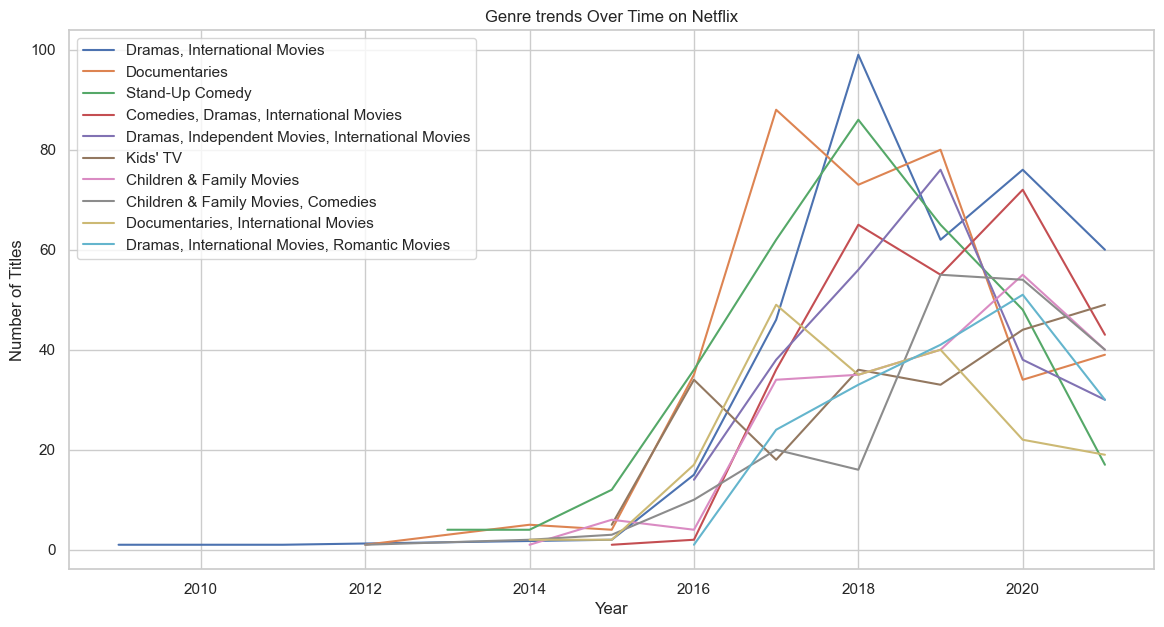

In [31]:
# count genre distribution by year added
genre_trend = data_exploded.groupby(["year_added", "genre"]).size().reset_index(name="count")

# Plot trend for top 5 genres over time
top_5_genres = top_genres.index.tolist()
plt.figure(figsize=(14,7))

for genre in top_5_genres:
    subset = genre_trend[genre_trend["genre"] == genre]
    plt.plot(subset["year_added"], subset["count"], label = genre)
    
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.title("Genre trends Over Time on Netflix")
plt.legend()
plt.show()

# Country - Wise Content Analysis

## 1.Countries with the Most Netflix Content

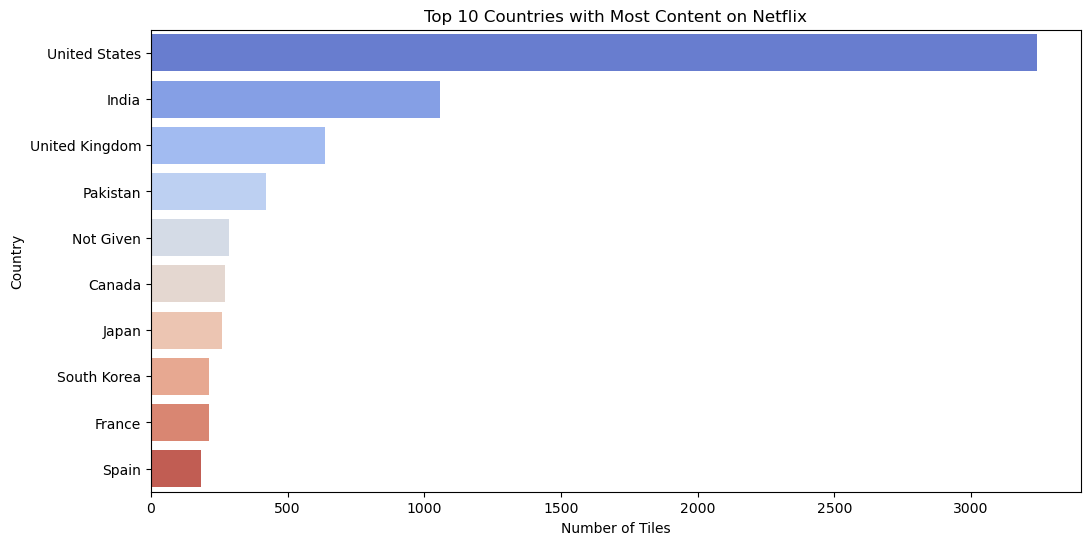

In [12]:
# count content by country (excluding missing values)
top_countries = data_exploded['country'].value_counts().head(10)

# plot top 10 countries
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette = 'coolwarm')
plt.xlabel('Number of Tiles')
plt.ylabel("Country")
plt.title("Top 10 Countries with Most Content on Netflix")
plt.show()

## 2.Genre Distribution by Country

<function matplotlib.pyplot.show(close=None, block=None)>

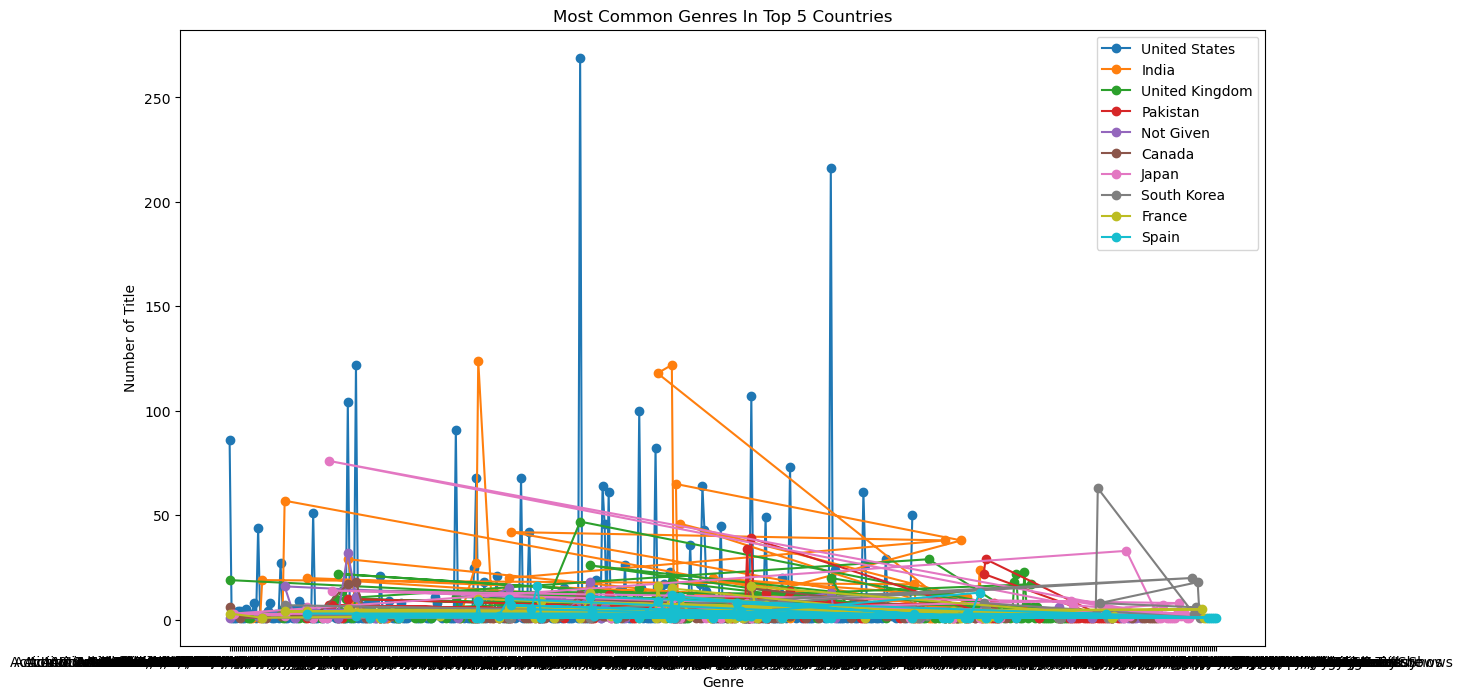

In [13]:
# count genre occurences per country
genre_by_country = data_exploded.groupby(["country", "genre"]).size().reset_index(name="count")

# get top 5 countries for visualization
top_5_countries = top_countries.index.tolist()

# Plot for each country
plt.figure(figsize=(14,8))
for country in top_5_countries:
    subset = genre_by_country[genre_by_country["country"] == country]
    plt.plot(subset["genre"], subset["count"], marker="o", label=country)
    
plt.xlabel("Genre")
plt.ylabel("Number of Title")
plt.title("Most Common Genres In Top 5 Countries")
plt.legend()
plt.show

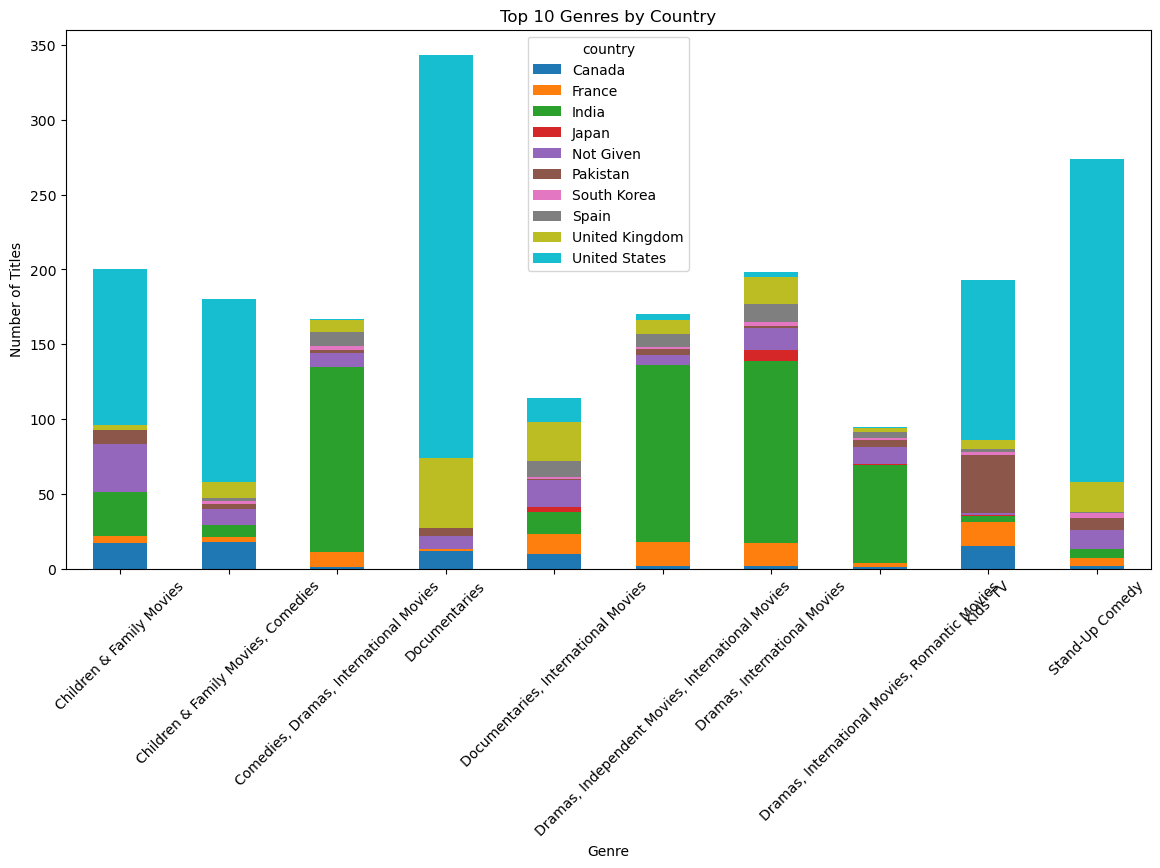

In [14]:
# get top 5 countries again
top_5_countries = top_countries.index.tolist()

# Filter dataset for top 5 countries
filtered_data = genre_by_country[genre_by_country["country"].isin(top_5_countries)]

# Get top 10 most common genres overall
top_10_genres = data_exploded["genre"].value_counts().head(10).index

# Filter only these top genres
filtered_data = filtered_data[filtered_data["genre"].isin(top_10_genres)]

# Plot data for stacked bar chart
pivot_data =filtered_data.pivot(index="genre", columns="country", values="count").fillna(0)

# Plot stacked bar chart
pivot_data.plot(kind="bar", stacked=True, figsize=(14, 7), colormap="tab10")

plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.title("Top 10 Genres by Country")
plt.xticks(rotation=45)
plt.legend(title="country")
plt.show()

# Netflix Originals vs. Older Content Analysis

In [15]:
# Ensure 'release_year' is numeric
data["release_year"] = pd.to_numeric(data["release_year"], errors="coerce")

# Filter out unrealistic years (e.g., before 1900)
data = data[data["release_year"] >= 1900]


In [16]:
data["is_netflix_original"] = data['listed_in'].str.contains('netflix', case=False, na=False)
data["is_netflix_original"] = data['director'].isna() & data["country"].isna()

In [17]:
# Check unique values in 'is_netflix_original' column
print(data["is_netflix_original"].unique())

# Check for NaN values in 'release_year'
print(data["release_year"].isna().sum())

# Group by 'release_year' and 'is_netflix_original'
originals_vs_others = data.groupby(["release_year", "is_netflix_original"]).size().unstack()

# Check the structure of the data before plotting
print(originals_vs_others.head())  # Print first few rows


[False]
0
is_netflix_original  False
release_year              
1925                     1
1942                     2
1943                     3
1944                     3
1945                     4


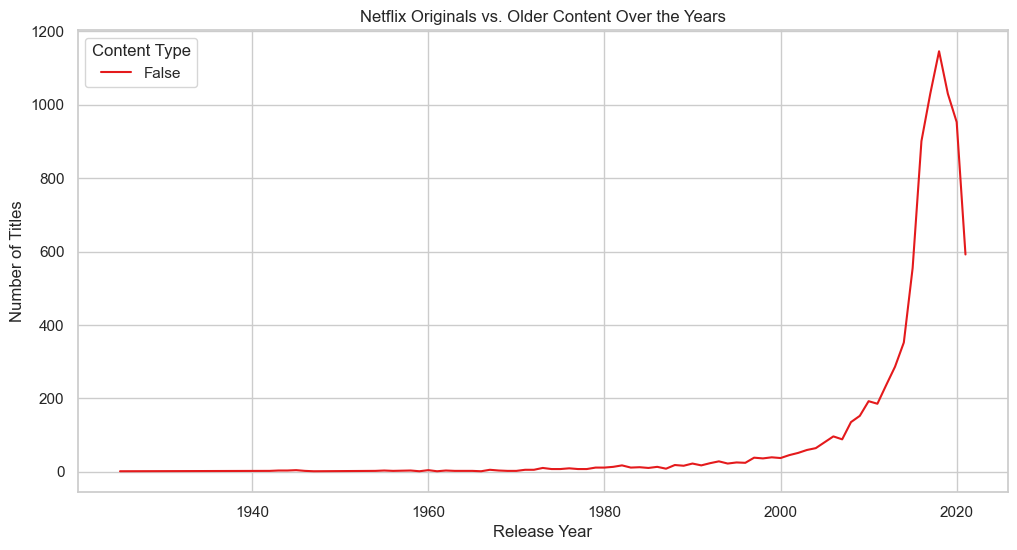

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count Netflix Originals and Older Content by Year
originals_vs_others = data.groupby(['release_year', 'is_netflix_original']).size().unstack(fill_value=0)
originals_vs_others = originals_vs_others.reset_index().melt(id_vars="release_year", var_name="category", value_name='count')

# Sort the data by release year
originals_vs_others = originals_vs_others.sort_values('release_year')

# Plot the trends
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.lineplot(data=originals_vs_others, x='release_year', y='count', hue='category', palette='Set1')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Netflix Originals vs. Older Content Over the Years')
plt.legend(title='Content Type')
plt.show()

# Age Ratings & Audience Targeting

In [19]:
print(data['rating'].value_counts())

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64


In [20]:
age_categories = {
    'G':'Kids','TV-Y':'Kids','TV-Y7':'Kids',
    'PG':'Family','TV-PG':'Family',
    'PG-13':'Teens','TV-14':'Teens',
    'R':'Mature','TV-MA':'Mature','NC-17':'Mature'
}

data['age_group'] = data['rating'].map(age_categories)
data.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added,duration_num,is_movie,is_tv_show,is_netflix_original,age_group
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",2017,1,17,2.0,0,1,False,Family
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,2018,9,13,3.0,0,1,False,Kids
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",2016,12,15,1.0,0,1,False,Family
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,2018,6,23,1.0,0,1,False,Kids
8789,s8786,TV Show,YOM,Not Given,Pakistan,2018-06-07,2016,TV-Y7,1 Season,Kids' TV,2018,6,7,1.0,0,1,False,Kids


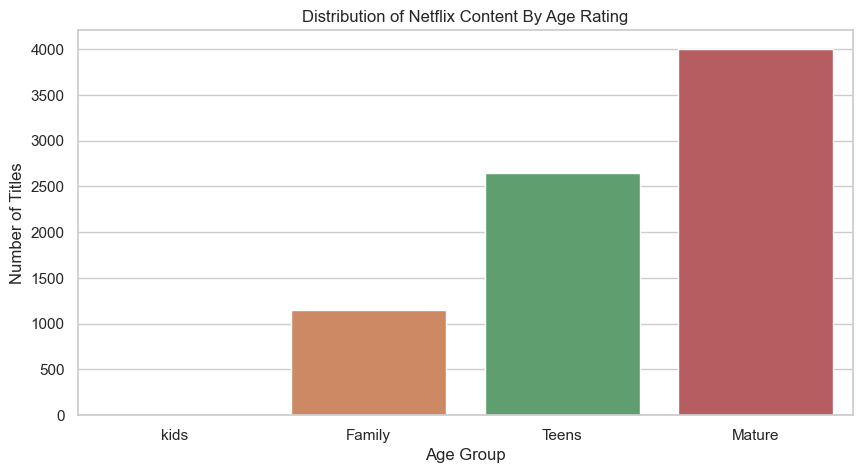

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(x=data['age_group'], order=['kids', 'Family', 'Teens', 'Mature'])
plt.xlabel("Age Group")
plt.ylabel("Number of Titles")
plt.title("Distribution of Netflix Content By Age Rating")
plt.show()

<Figure size 1200x600 with 0 Axes>

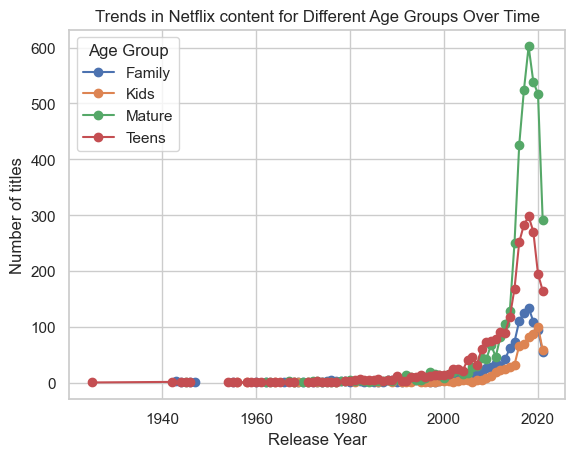

In [22]:
age_trends = data.groupby(['release_year', 'age_group']).size().unstack()

plt.figure(figsize=(12,6))
age_trends.plot(kind='line', marker='o')
plt.xlabel("Release Year")
plt.ylabel("Number of titles")
plt.title("Trends in Netflix content for Different Age Groups Over Time")
plt.legend(title='Age Group')
plt.show()

# Seasonal Trends & Release Patterns

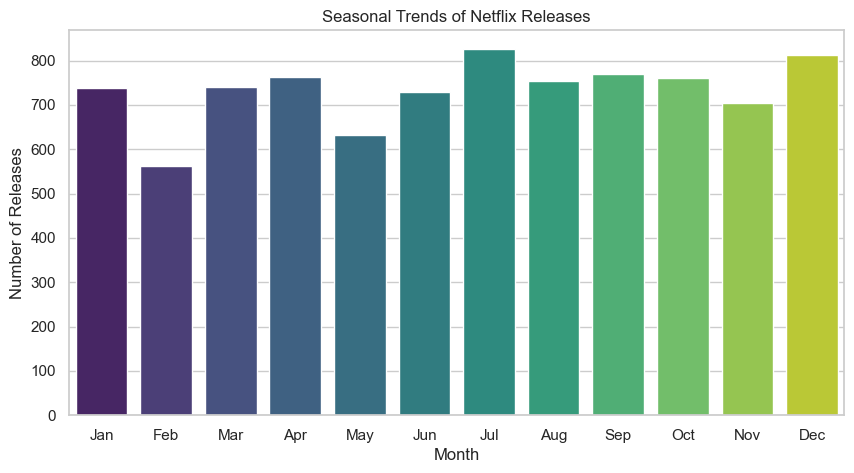

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting the month from thr release date
data['release_month'] = pd.to_datetime(data['date_added']).dt.month

# Counting the number of releases per month
monthly_trends = data['release_month'].value_counts().sort_index()

# Plot the seasonal trend
plt.figure(figsize=(10,5))
sns.barplot(x=monthly_trends.index, y=monthly_trends.values, palette='viridis')
# Formatting the plot
plt.xticks(ticks=range(12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel("Month")
plt.ylabel("Number of Releases")
plt.title("Seasonal Trends of Netflix Releases")
plt.show()

# Monthly releases of Movies and Tv shows

In [24]:
monthly_release = data.groupby(['release_month', 'type']).size().unstack()

month_order =['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November','December']

# Reindexing to maintain order
monthly_release.index = pd.Categorical(monthly_release.index, categories=range(1,13), ordered=True)
monthly_release = monthly_release.sort_index()

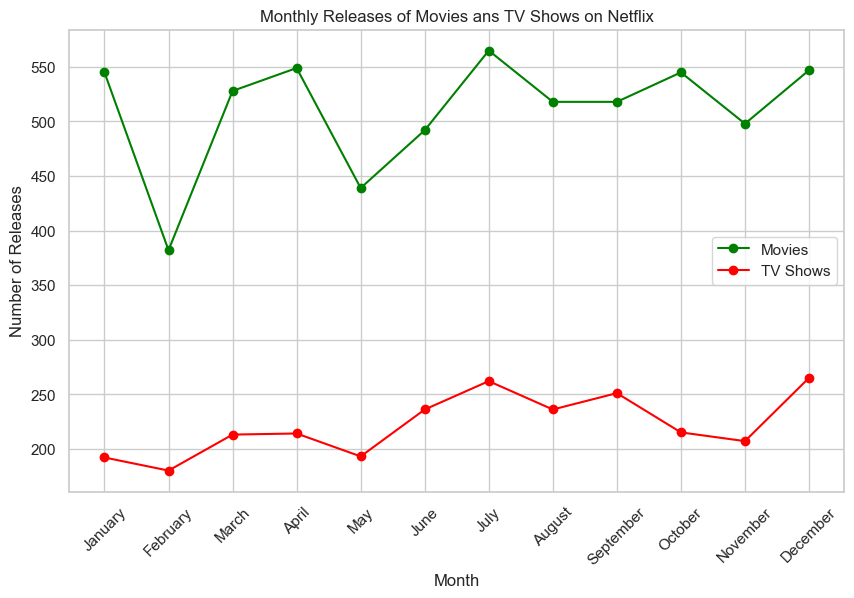

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(monthly_release.index,monthly_release['Movie'], marker='o', label='Movies', color='green')
plt.plot(monthly_release.index,monthly_release['TV Show'], marker='o', label='TV Shows', color='red')

plt.xticks(ticks=range(1,13), labels = month_order, rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Releases")
plt.title("Monthly Releases of Movies ans TV Shows on Netflix")
plt.legend()
plt.grid(True)
plt.show()

# Count of Movies vs. TV Shows

In [26]:
movie_tv_counts =data['type'].value_counts()
print(movie_tv_counts)

Movie      6126
TV Show    2664
Name: type, dtype: int64


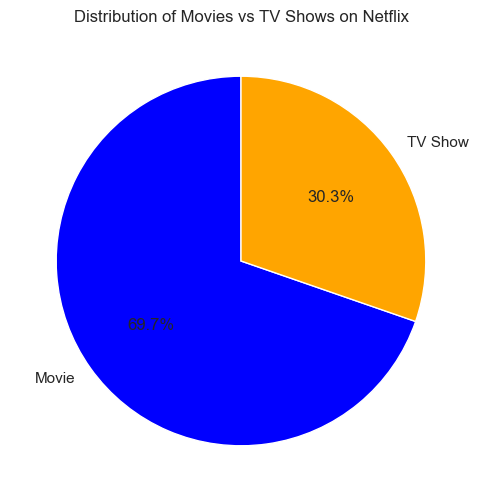

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.pie(movie_tv_counts,labels=movie_tv_counts.index, autopct='%1.1f%%',colors=['blue', 'orange'], startangle=90)
plt.title("Distribution of Movies vs TV Shows on Netflix")
plt.show()


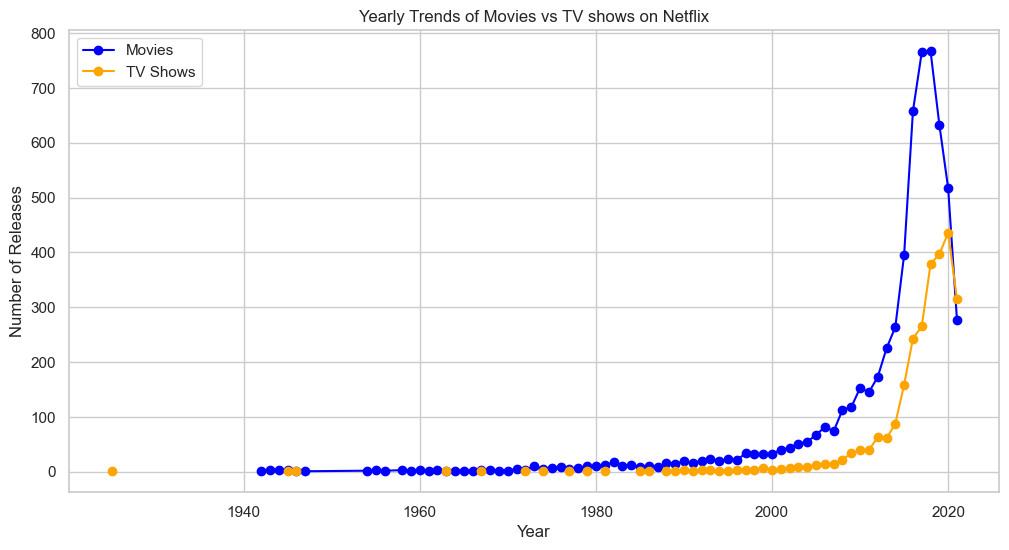

In [28]:
yearly_trend = data.groupby(['release_year', 'type']).size().unstack()

plt.figure(figsize=(12,6))
plt.plot(yearly_trend.index,yearly_trend['Movie'],marker='o', label='Movies', color='blue')
plt.plot(yearly_trend.index,yearly_trend['TV Show'],marker='o', label='TV Shows', color='orange')

plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.title("Yearly Trends of Movies vs TV shows on Netflix")
plt.legend()
plt.grid(True)
plt.show()

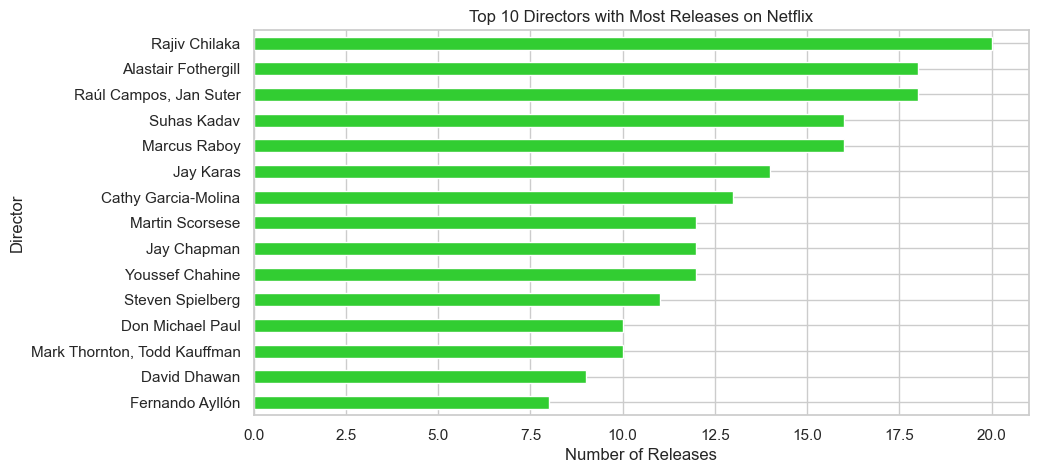

In [29]:
import pandas as pd
import matplotlib.pyplot as plt



# Count the number of movies/shows each director has
data = data[data['director'].str.lower() != "not given"]

top_directors = data['director'].value_counts().head(15)  # Top 10 directors

# Plot
plt.figure(figsize=(10, 5))
top_directors.sort_values().plot(kind='barh', color='limegreen')
plt.xlabel("Number of Releases")
plt.ylabel("Director")
plt.title("Top 10 Directors with Most Releases on Netflix")
plt.show()


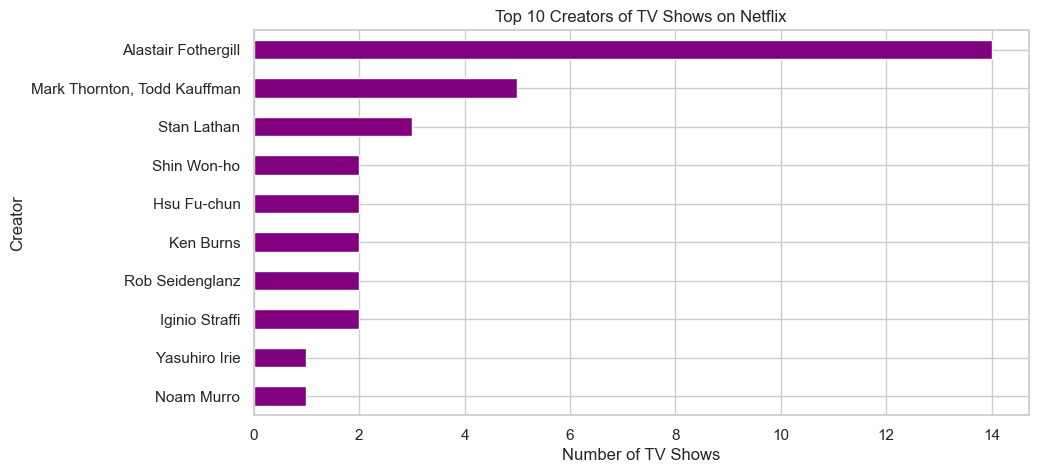

In [30]:
# Drop missing creator values
data_tv_creators = data[data['type'] == 'TV Show'].dropna(subset=['director'])  # Replace 'director' with 'creator' if available
data = data[data['director'].str.lower() != "not given"]

# Count the number of shows each creator has
top_creators = data_tv_creators['director'].value_counts().head(10)  # Top 10 creators

# Plot
plt.figure(figsize=(10, 5))
top_creators.sort_values().plot(kind='barh', color='purple')
plt.xlabel("Number of TV Shows")
plt.ylabel("Creator")
plt.title("Top 10 Creators of TV Shows on Netflix")
plt.show()
